In [38]:
import matplotlib.pyplot as plt
import numpy as np
from bowzer.utils import open_json

In [35]:
paths = {
    '25 Epochs':'model_store\model_125646_performance.json',
    '10 Epochs': 'model_store\model_201345_performance.json',
    '10_tes':'model_store\model_202426_performance.json'
    }
model_losses = {}
for label in paths:
    model_perf = open_json(paths[label])
    total_loss = []
    for epoch in [x for x in model_perf.keys() if 'epoch' in x.lower()]:
        epoch_losses = model_perf[epoch]['loss_list']
        total_loss.append(sum(epoch_losses)/ len(epoch_losses))
    model_losses[label] = total_loss

Loading: model_store\model_125646_performance.json
Loading: model_store\model_201345_performance.json
Loading: model_store\model_202426_performance.json


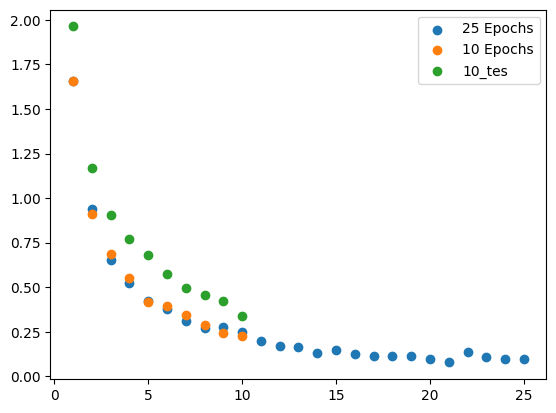

In [37]:
fig, ax = plt.subplots()
for label in model_losses:
    total_loss = model_losses[label]
    plt.scatter(x = np.linspace(1, len(total_loss), len(total_loss)).astype(int), y = total_loss , label=label)
plt.legend()
plt.show()